In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import sklearn

# submission functionality
# ------------------------
import os, sys
sys.path.append(os.path.abspath("..")) # so src/ is on the path

import importlib
import submission_utils
importlib.reload(submission_utils) # force reload latest code

from submission_utils import save_submission
# ------------------------

In [5]:
# Load dataset
milk_data = pd.read_csv("../../data/cattle_data_train.csv")
# Extract labels
labels = milk_data["Milk_Yield_L"]
# Remove the label column from the feature set
milk_features = milk_data.drop('Milk_Yield_L', axis=1)  # axis=1 = drop column

In [6]:
#categoricals
breed_data = milk_features['Breed']
climate_data = milk_features['Climate_Zone']
manage_data = milk_features['Management_System']
lactate_data = milk_features['Lactation_Stage']
feed_data = milk_features['Feed_Type']
print(climate_data.value_counts(dropna = False))
print()
print(breed_data.value_counts(dropna = False))
print()
print(manage_data.value_counts(dropna = False))

Climate_Zone
Temperate        35224
Tropical         35062
Mediterranean    34994
Arid             34954
Subtropical      34937
Continental      34829
Name: count, dtype: int64

Breed
Holstein        104775
Jersey           42183
Guernsey         31672
Brown Swiss      31155
Holstien           112
 Brown Swiss        57
Brown Swiss         46
Name: count, dtype: int64

Management_System
Intensive         42225
Pastoral          42126
Extensive         41973
Semi_Intensive    41906
Mixed             41770
Name: count, dtype: int64


In [7]:
print(lactate_data.value_counts(dropna = False))
print()
print(feed_data.value_counts(dropna = False))

Lactation_Stage
Mid      83895
Early    63203
Late     62902
Name: count, dtype: int64

Feed_Type
Dry_Fodder       26558
Pasture_Grass    26305
Crop_Residues    26278
Concentrates     26231
Mixed_Feed       26229
Green_Fodder     26198
Silage           26111
Hay              26090
Name: count, dtype: int64


In [8]:
milk_features['Breed'] = milk_features['Breed'].str.strip()
milk_features['Breed'] = milk_features['Breed'].replace({'Holstien': 'Holstein'})
print(milk_features['Breed'].value_counts())

Breed
Holstein       104887
Jersey          42183
Guernsey        31672
Brown Swiss     31258
Name: count, dtype: int64


In [9]:
print(milk_features.isnull().sum())

Cattle_ID                      0
Breed                          0
Climate_Zone                   0
Management_System              0
Age_Months                     0
Weight_kg                      0
Parity                         0
Lactation_Stage                0
Days_in_Milk                   0
Feed_Type                      0
Feed_Quantity_kg           10481
Feeding_Frequency              0
Water_Intake_L                 0
Walking_Distance_km            0
Grazing_Duration_hrs           0
Rumination_Time_hrs            0
Resting_Hours                  0
Ambient_Temperature_C          0
Humidity_percent               0
Housing_Score               6279
FMD_Vaccine                    0
Brucellosis_Vaccine            0
HS_Vaccine                     0
BQ_Vaccine                     0
Anthrax_Vaccine                0
IBR_Vaccine                    0
BVD_Vaccine                    0
Rabies_Vaccine                 0
Previous_Week_Avg_Yield        0
Body_Condition_Score           0
Milking_In

In [10]:
milk_features['Feed_Quantity_kg'] = milk_features.groupby('Feed_Type')['Feed_Quantity_kg'].transform(lambda x: x.fillna(x.median()))
milk_features['Feed_Quantity_lb'] = milk_features.groupby('Feed_Type')['Feed_Quantity_lb'].transform(lambda x: x.fillna(x.median()))

In [11]:
milk_features['Housing_Score'] = milk_features['Housing_Score'].transform(lambda x: x.fillna(x.median()))

In [12]:
print(milk_features.isnull().sum())

Cattle_ID                  0
Breed                      0
Climate_Zone               0
Management_System          0
Age_Months                 0
Weight_kg                  0
Parity                     0
Lactation_Stage            0
Days_in_Milk               0
Feed_Type                  0
Feed_Quantity_kg           0
Feeding_Frequency          0
Water_Intake_L             0
Walking_Distance_km        0
Grazing_Duration_hrs       0
Rumination_Time_hrs        0
Resting_Hours              0
Ambient_Temperature_C      0
Humidity_percent           0
Housing_Score              0
FMD_Vaccine                0
Brucellosis_Vaccine        0
HS_Vaccine                 0
BQ_Vaccine                 0
Anthrax_Vaccine            0
IBR_Vaccine                0
BVD_Vaccine                0
Rabies_Vaccine             0
Previous_Week_Avg_Yield    0
Body_Condition_Score       0
Milking_Interval_hrs       0
Date                       0
Farm_ID                    0
Feed_Quantity_lb           0
Mastitis      

In [13]:
milk_features["Date"] = pd.to_datetime(milk_features["Date"])

In [14]:
milk_features["Date"]

0        2024-01-15
1        2023-10-31
2        2024-05-20
3        2024-07-22
4        2023-01-03
            ...    
209995   2022-05-29
209996   2023-06-29
209997   2024-08-11
209998   2023-01-11
209999   2022-11-20
Name: Date, Length: 210000, dtype: datetime64[ns]

In [15]:
milk_features.head()

,Cattle_ID,Breed,Climate_Zone,Management_System,Age_Months,Weight_kg,Parity,Lactation_Stage,Days_in_Milk,Feed_Type,...,IBR_Vaccine,BVD_Vaccine,Rabies_Vaccine,Previous_Week_Avg_Yield,Body_Condition_Score,Milking_Interval_hrs,Date,Farm_ID,Feed_Quantity_lb,Mastitis
0,CATTLE_133713,Holstein,Tropical,Intensive,114,544.8,4,Mid,62,Concentrates,...,1,0,1,6.31,3.0,12,2024-01-15,FARM_0301,36.8235,1
1,CATTLE_027003,Holstein,Arid,Mixed,136,298.9,4,Mid,213,Crop_Residues,...,0,0,0,17.16,4.0,12,2023-10-31,FARM_0219,26.4600,0
2,CATTLE_122459,Holstein,Tropical,Semi_Intensive,64,336.6,4,Late,16,Hay,...,1,1,0,4.07,3.5,12,2024-05-20,FARM_0802,16.0965,0
3,CATTLE_213419,Jersey,Mediterranean,Intensive,58,370.5,1,Early,339,Crop_Residues,...,0,0,0,10.23,3.0,24,2024-07-22,FARM_0034,40.7925,0
4,CATTLE_106260,Guernsey,Subtropical,Intensive,84,641.5,6,Early,125,Mixed_Feed,...,0,1,1,20.68,3.0,12,2023-01-03,FARM_0695,33.7365,1


In [16]:
milk_features["Milking_Interval_hrs"].value_counts()

Milking_Interval_hrs
12    147167
8      31399
24     20984
6      10450
Name: count, dtype: int64

In [17]:
milk_features = milk_features.drop("Feed_Quantity_lb", axis=1)

In [18]:
milk_features["Farm_ID"]

0         FARM_0301
1         FARM_0219
2         FARM_0802
3         FARM_0034
4         FARM_0695
            ...    
209995    FARM_0440
209996    FARM_0570
209997    FARM_0836
209998    FARM_0333
209999    FARM_0450
Name: Farm_ID, Length: 210000, dtype: object

In [19]:
numeric_cols = milk_features.select_dtypes(include='number').columns
farm_features = milk_features.groupby("Farm_ID")[numeric_cols].mean()

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
farm_scaled = scaler.fit_transform(farm_features)
kmeans = KMeans(n_clusters=10, random_state=42)
farm_features['Cluster'] = kmeans.fit_predict(farm_scaled)
# Map back to main dataset
milk_features['Farm_Cluster'] = milk_features['Farm_ID'].map(farm_features['Cluster'])

In [21]:
milk_features['Farm_Cluster'].value_counts()

Farm_Cluster
2    27799
7    23815
0    22940
8    22562
1    20764
6    19430
9    18763
4    18602
5    18269
3    17056
Name: count, dtype: int64

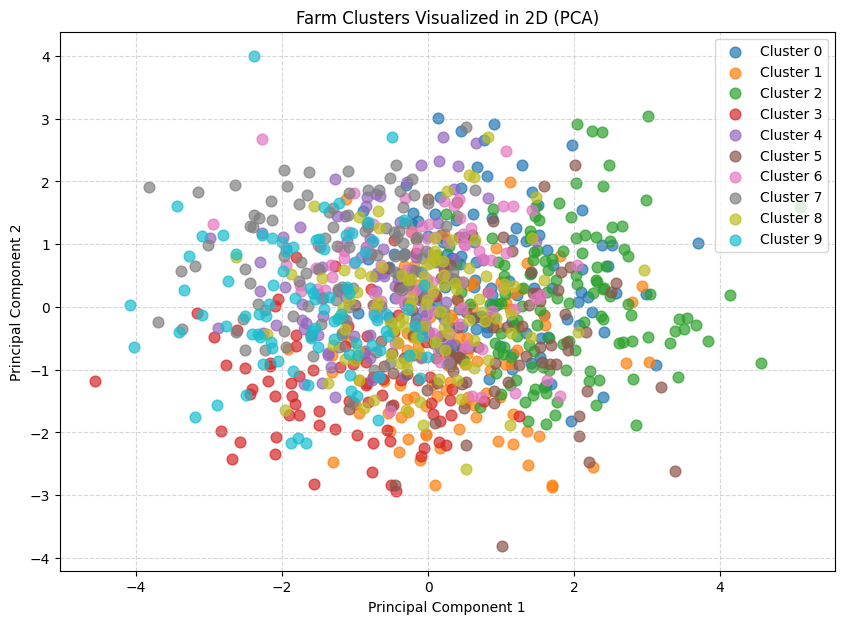

In [22]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Assume farm_features has numeric columns and 'Cluster' column
numeric_cols = farm_features.select_dtypes(include='number').columns.drop('Cluster')
# Standardize features
scaler = StandardScaler()
farm_scaled = scaler.fit_transform(farm_features[numeric_cols])
# PCA to reduce to 2D
pca = PCA(n_components=2, random_state=42)
farm_pca = pca.fit_transform(farm_scaled)
# Scatter plot in Matplotlib
plt.figure(figsize=(10,7))
# Get unique clusters
clusters = np.unique(farm_features['Cluster'])
# Define colors
colors = plt.cm.tab10(np.linspace(0, 1, len(clusters)))
for cluster, color in zip(clusters, colors):
    idx = farm_features['Cluster'] == cluster
    plt.scatter(farm_pca[idx,0], farm_pca[idx,1], label=f'Cluster {cluster}', color=color, s=60, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Farm Clusters Visualized in 2D (PCA)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
